In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import curve_fit
from scipy.integrate import quad

In [2]:
ha_list = [('8133-12705', 0.130943), ('8256-12704', 0.12611), ('8616-3703', 0.135063),
             ('8720-12702', 0.134953), ('8721-3701', 0.118101)]
#('8137-9101', 0.118865),

ha_list_uncertain = ['8155-6103(?)', '8254-6103(?)', '8338-12705(?)', '8606-12704(?)']

ha_list2 = [('7815-6103', 0.135043), ('7991-12705', 0.113153), ('7992-9102', 0.119399), ('8132-6101', 0.129403),
             ('8132-12703', 0.116056), ('8133-12704', 0.134471), ('8137-3702', 0.131997),
             ('8143-6101', 0.126168), ('8244-12704', 0.115137), ('8318-6102', 0.12908), ('8329-6102', 0.142887),
             ('8439-3703', 0.138619), ('8448-3703', 0.138746), ('8464-6101', 0.125582), ('9049-1901', 0.131457)]

# ('8135-1902', 0.117997),
ha_list2_uncertain = ['8454-6102(?)', '8552-9102(?)', '8717-1902(?)']

In [3]:
def spectrum_gen(flux, ivar):    
    n = len(flux)
    sumflux = np.zeros(4563)

    for i in range(n):
        for j in range(n):
            flux_ = flux[i,j] * ~do_not_use[i,j]
            flux_filtered = sigma_gen_compare(ivar[i,j], flux_)
            sumflux = np.add(sumflux, flux_)
    return sumflux

In [4]:
def sigma_gen_compare(ivar, flux_masked):
    
    # change ivar array to sigma array 
    
    sigma = np.sqrt(np.abs(np.divide(1, ivar, where = ivar != 0)))
#     print(sigma)
    
    is_less_than_3sigma = flux_masked < 3 * sigma # compare the sigma array 
#     print(flux_masked)
#     print(is_less_than_3sigma)
        
    flux_masked_filtered = flux_masked * ~is_less_than_3sigma # multiply the truth value
    
    return flux_masked_filtered

In [5]:
def gaussian(x, amp, mean, sigma):
    return (amp * np.exp(-(x-mean)**2 / (2*sigma**2)))

6563 6548 6583

In [6]:
def three_gaussian(x, 
                   a_ha, a_6548, a_6583,
                   m_ha, m_6548, m_6583,
                   s_ha, s_6548, s_6583,
                   base):
    gaussian_ha = gaussian(x, amp_ha, mean_ha, sigma_ha)
    gaussian_6548 = gaussian(x, amp_6548, mean_6548, sigma_6548)
    gaussian_6583 = gaussian(x, amp_6583, mean_6583, sigma_6583)
    return gaussian_ha + gaussian_6548 + gaussian_6583 + base

In [7]:
(6583+6548)/2, 6583-6548, 6555, 6575

(6565.5, 35, 6555, 6575)

In [8]:
# np.where(np.logical_and(wave > 6555, wave < 6576))

In [9]:
# wave[2577], wave[2590]

In [10]:
# lb_ha = 2577
# ub_ha = 2590

# lb_6548 = 6533
# ub_6548 = 6563

# lb_6583 = 6568
# ub_6583 = 6598

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Area 3070.64023252302


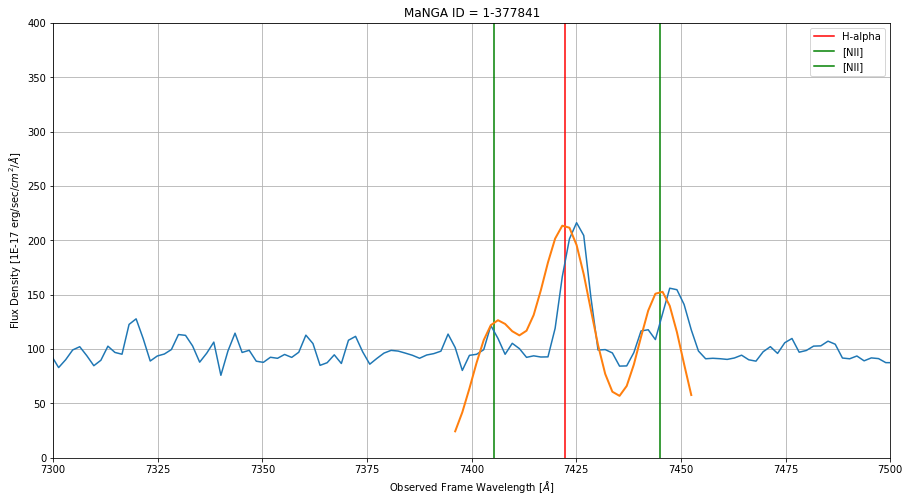

Area 4011.110004895522


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


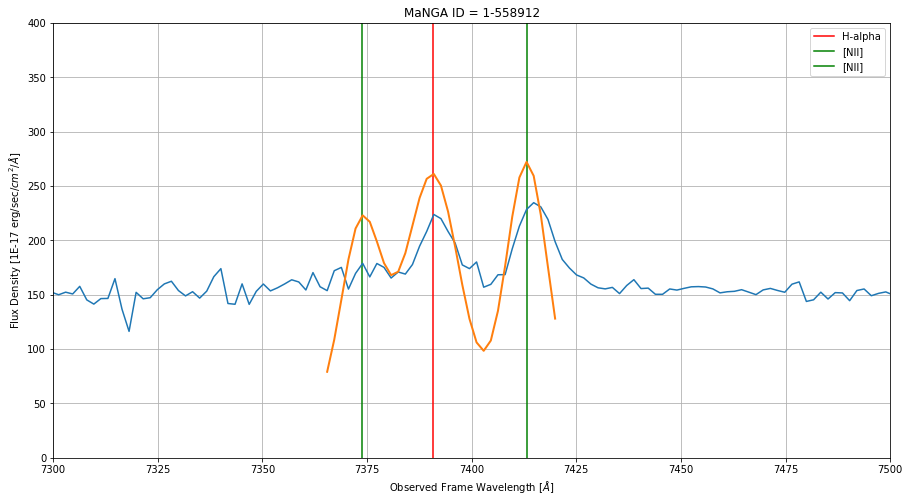

Area 3077.591600157383


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


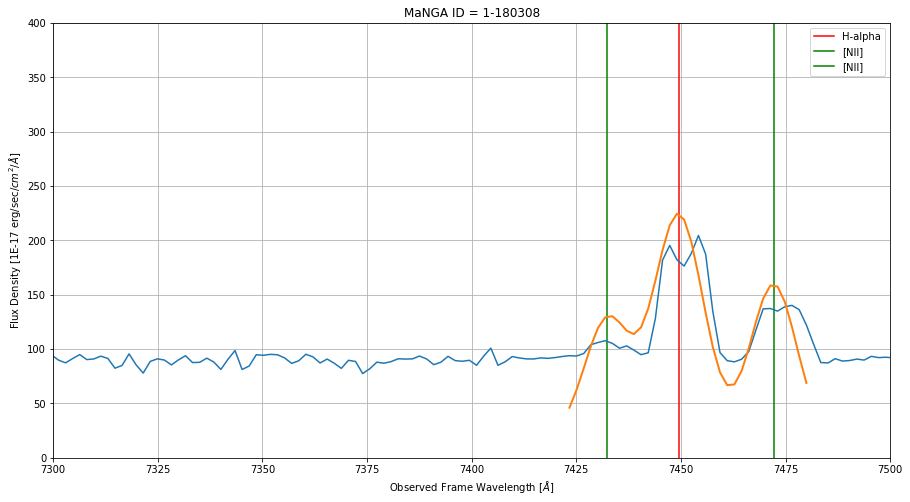

Area 2363.2457813646542


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


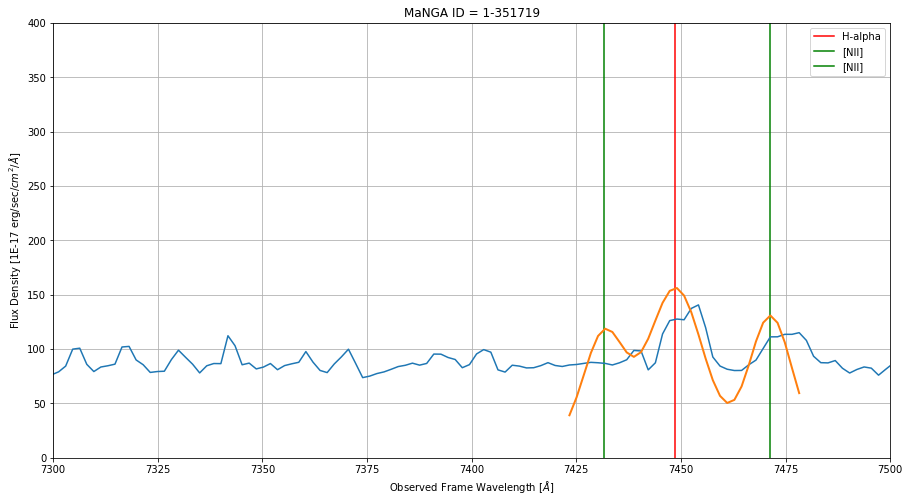

Area 3021.141996486767


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


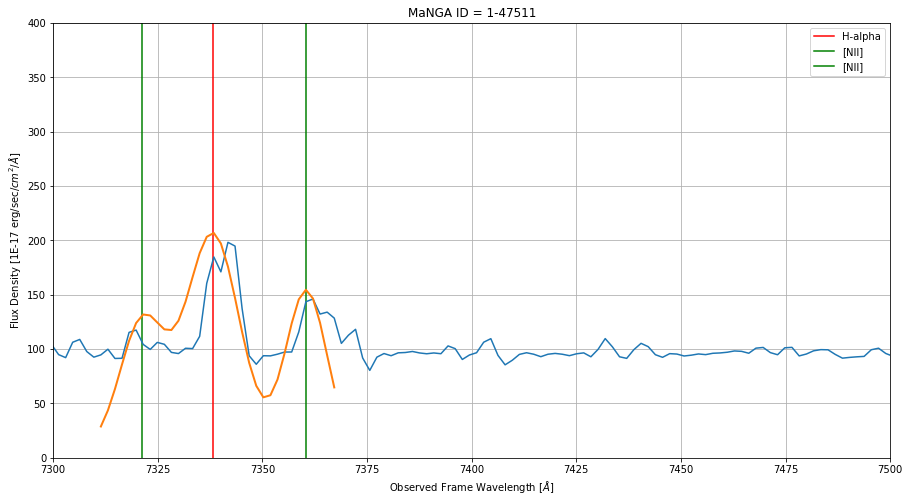

In [11]:
for plateifu in ha_list:
#     print(plateifu)
    data = fits.open(f'/Volumes/WD_External/MaNGA_Sample/manga-{plateifu[0]}-LOGCUBE.fits.gz')
    mangaid = data[0].header['MANGAID']
    
    flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))

    ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

    mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))
    
    do_not_use = (mask & 2**10) != 0 
    
    wave = data['WAVE'].data
    
    sumflux = spectrum_gen(flux, ivar)
    
    peak_ha = 6563*(1+plateifu[1])
    peak_6548 = 6548*(1+plateifu[1])
    peak_6583 = 6583*(1+plateifu[1])
#     print(peak)
    bound_ha = np.where(np.logical_and(wave > peak_ha-10, wave < peak_ha+13))
    bound_6548 = np.where(np.logical_and(wave > peak_6548-10, wave < peak_6548+10))
    bound_6583 = np.where(np.logical_and(wave > peak_6583-10, wave < peak_6583+10))
    
#     print('bound', bound_6548, bound_6583)
    
    lb_ha = bound_ha[0][0]
    ub_ha = bound_ha[0][-1]
    
    lb_6548 = bound_6548[0][0]
    ub_6548 = bound_6548[0][-1] 
    
    lb_6583 = bound_6583[0][0]
    ub_6583 = bound_6583[0][-1] 
    
#     print(lb_6583 - ub_6548)
    
#     print(lb_6548, ub_6548, lb_ha, ub_ha, lb_6583, ub_6583)
#     print(wave[lb_6548], wave[ub_6548], wave[lb_ha], wave[ub_ha], wave[lb_6583], wave[ub_6583])
    
    sumflux_slice_ha = sumflux[lb_ha : ub_ha]
    sumflux_slice_6548 = sumflux[lb_6548 : ub_6548]
    sumflux_slice_6583 = sumflux[lb_6583 : ub_6583]
    
    sumflux_slice = sumflux[lb_6548 : ub_6583]
    
#     print('sumflux_slice',sumflux_slice)

    wave_slice_ha = wave[lb_ha : ub_ha]
    wave_slice_6548 = wave[lb_6548 : ub_6548]
    wave_slice_6583 = wave[lb_6583 : ub_6583]
    
    wave_slice = wave[lb_6548 : ub_6583]
    
#     print('wave_slice', wave_slice)
#     print(len(wave_slice_ha))
#     print(len(wave[ub_6548 : lb_6583]))
    
    amp_ha = max(sumflux_slice_ha)
    mean_ha = peak_ha
    sigma_ha = np.std(wave_slice_ha)
#     base_ha = min(sumflux_slice_ha)
    
    amp_6548 = max(sumflux_slice_6548)
    mean_6548 = peak_6548
    sigma_6548 = np.std(wave_slice_6548)
#     base_6548 = min(sumflux_slice_6548)
    
    amp_6583 = max(sumflux_slice_6583)
    mean_6583 = peak_6583
    sigma_6583 = np.std(wave_slice_6583)
#     base_6583 = min(sumflux_slice_6583)

    base = min(sumflux_slice)
    
    p0_ = [amp_ha, amp_6548, amp_6583,
           mean_ha, mean_6548, mean_6583,
           sigma_ha, sigma_6548, sigma_6583,
           base]
    
    popt, pcov = curve_fit(three_gaussian, wave_slice, sumflux_slice, p0 = p0_)
    
#     print(len(three_gaussian(wave_slice, *popt)[ub_6583 - ub_6548 : ub_6583 - lb_6583]))
#     print(ub_6583 - lb_6548)
#     print(lb_6583 - ub_6548)
#     print(ub_6548 - lb_6548, (ub_6583 - ub_6548) - (ub_6583 - lb_6583))
#     print(len(wave_slice_ha))
    
    dx = (wave_slice_ha[-1] - wave_slice_ha[0]) / len(wave_slice_ha)
    left_idx = ub_6548 - lb_6548
    right_idx = left_idx + len(wave_slice_ha)
    
#     print(three_gaussian(wave_slice, *popt))
    area = np.trapz(three_gaussian(wave_slice, *popt)[left_idx : right_idx], wave_slice_ha, dx = dx)
    print('Area', area)
#     print('popt', popt)
#     print('pcov', pcov)
    
# #     print('amp', amp)
# #     print('sigma', sigma)
# #     print('base', base)
    
#     popt, pcov = curve_fit(gaussian, wave_slice, sumflux_slice, p0 = [amp, mean, sigma, base])
# #     print('popt', popt)
# #     print('pcov', pcov)
    
# #     plt.plot(wave_slice, gaussian(wave_slice, *popt))
# #     plt.show()
    
# #     print(sumflux, len(sumflux))
    
    plt.figure(figsize = (15,8))
    plt.grid()
    plt.axvline(6563*(1+plateifu[1]), color = 'red', label = 'H-alpha')
    plt.axvline(6548*(1+plateifu[1]), color = 'green', label = '[NII]')
    plt.axvline(6583*(1+plateifu[1]), color = 'green', label = '[NII]')
    plt.legend()
#     plt.axvline(wave[lb], color = 'deeppink')
#     plt.axvline(wave[ub], color = 'deeppink')
#     plt.xlim(6300,6700)
    plt.xlim(7300, 7500)
#     plt.xlim(wave[lb]-10, wave[ub]+10)
    plt.ylim(0,400)
    plt.xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
    plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
    plt.title(f'MaNGA ID = {mangaid}')
    
    plt.plot(wave, sumflux)
    plt.plot(wave_slice, three_gaussian(wave_slice, *popt), linewidth = 2)
    
    plt.show()

Area 3510.700636790515


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


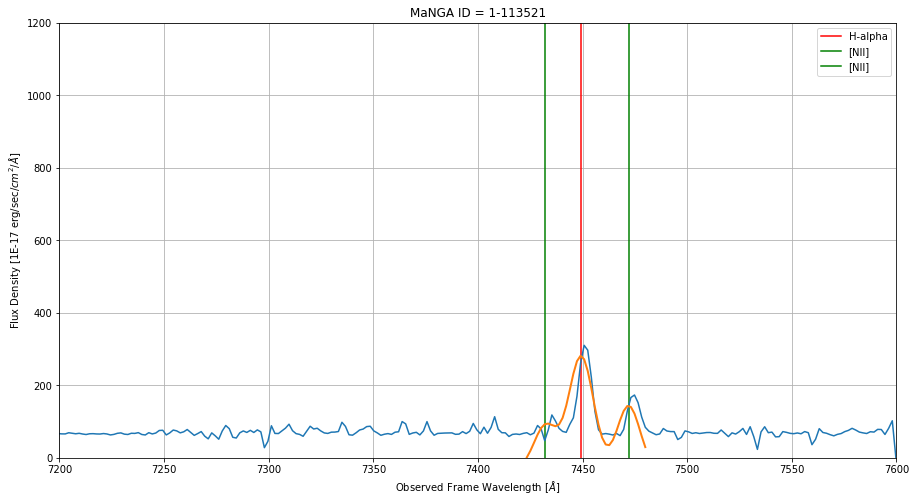

Area 2740.1076506144327


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


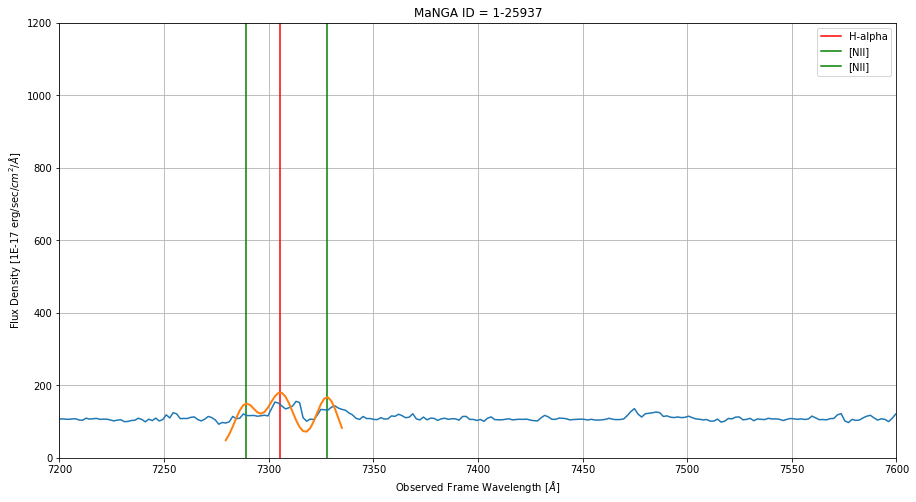

Area 2786.7916384871814


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


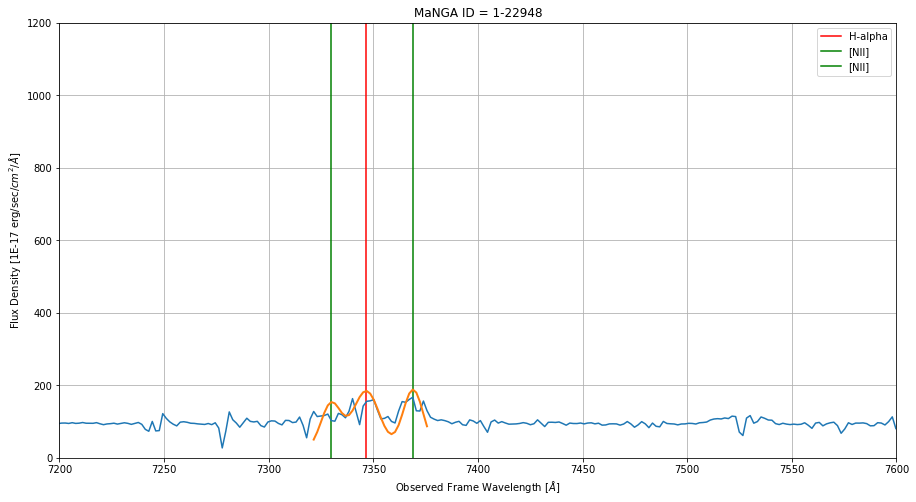

Area 3025.1070402092437


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


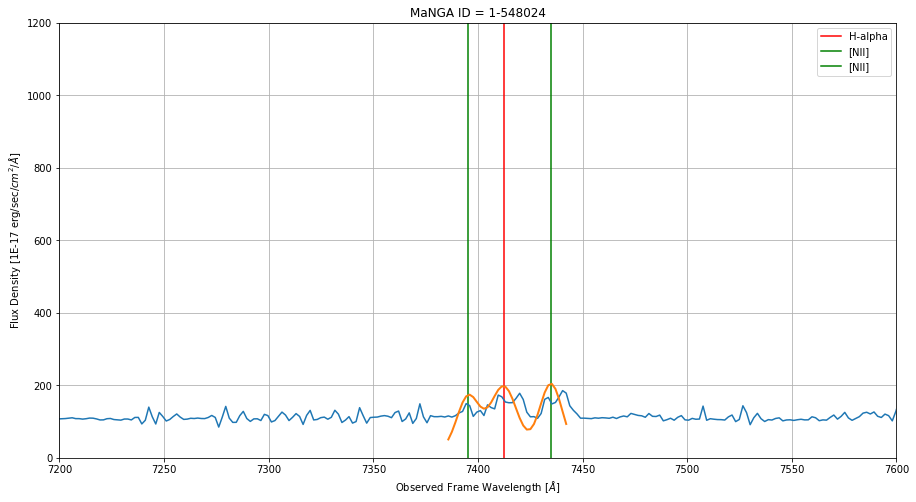

Area 5113.232171837357


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


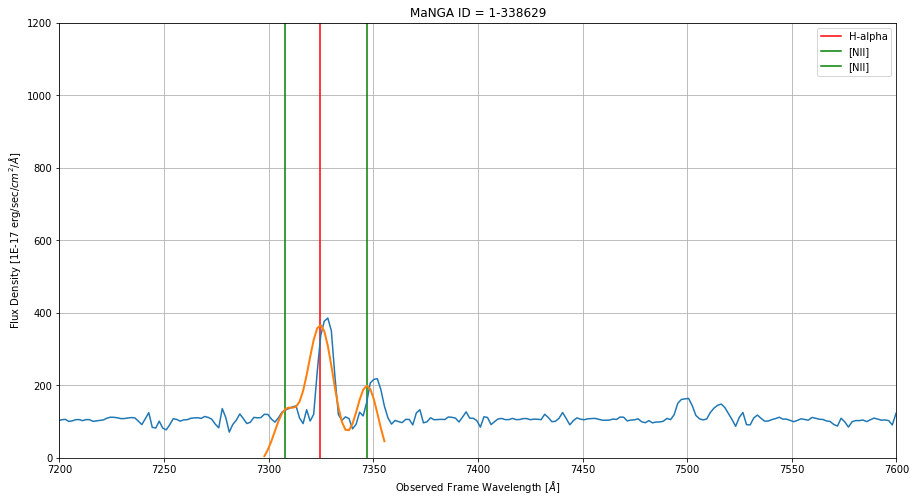

Area 2347.9528293137855


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


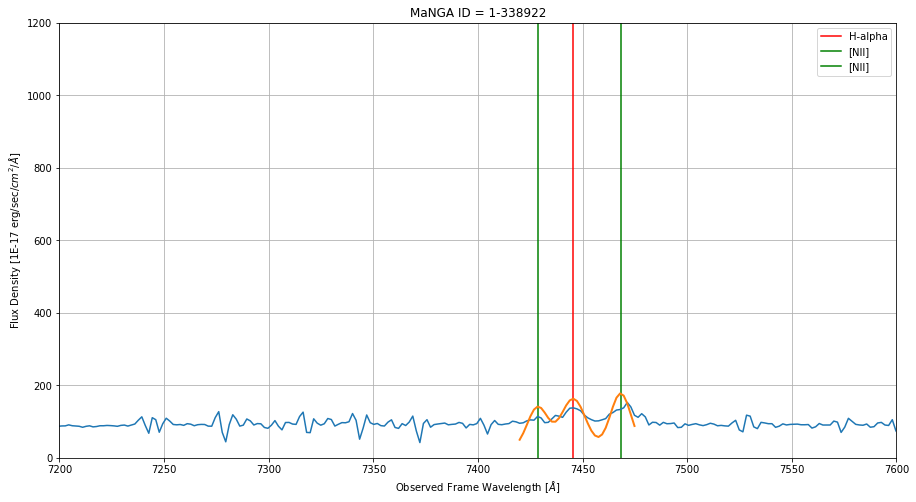

Area 2578.3623998314183


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


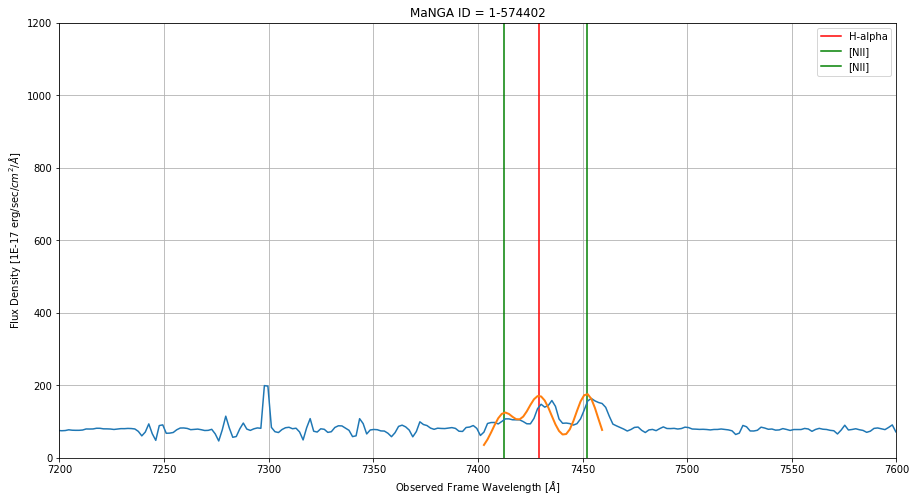

Area 3908.907896401857


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


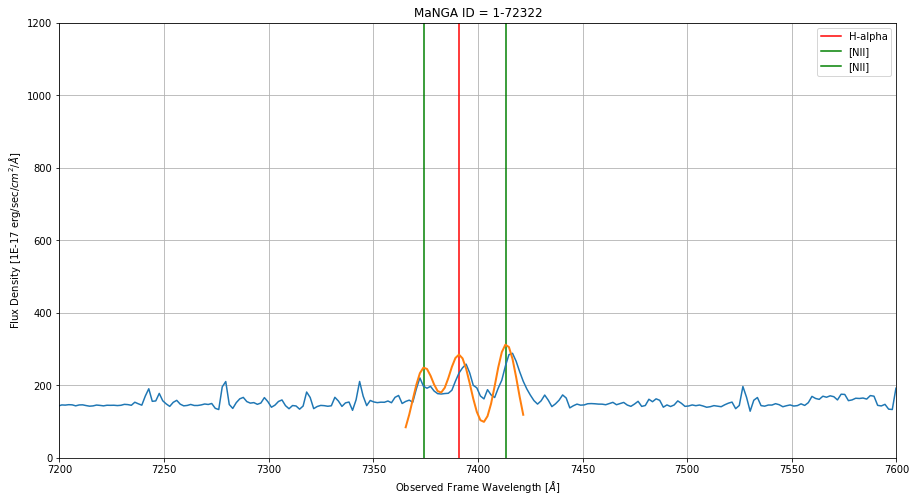

Area 4699.577289335522


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


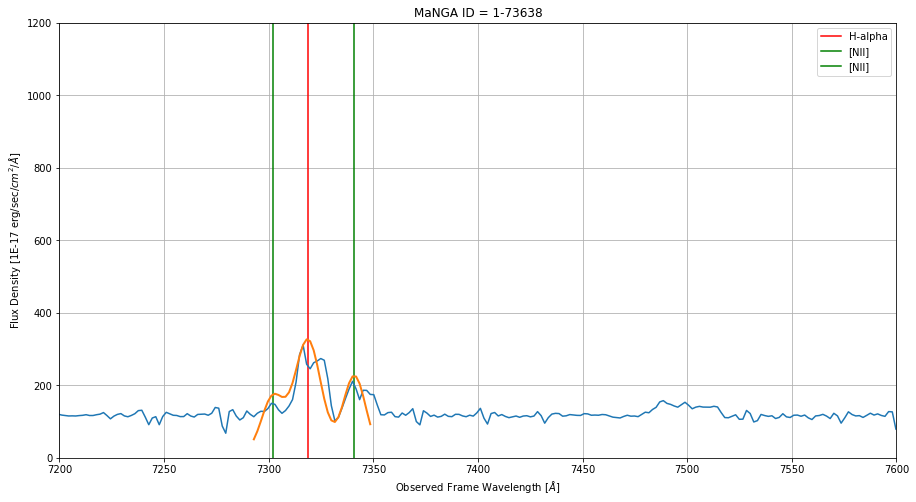

Area 4384.558706877143


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


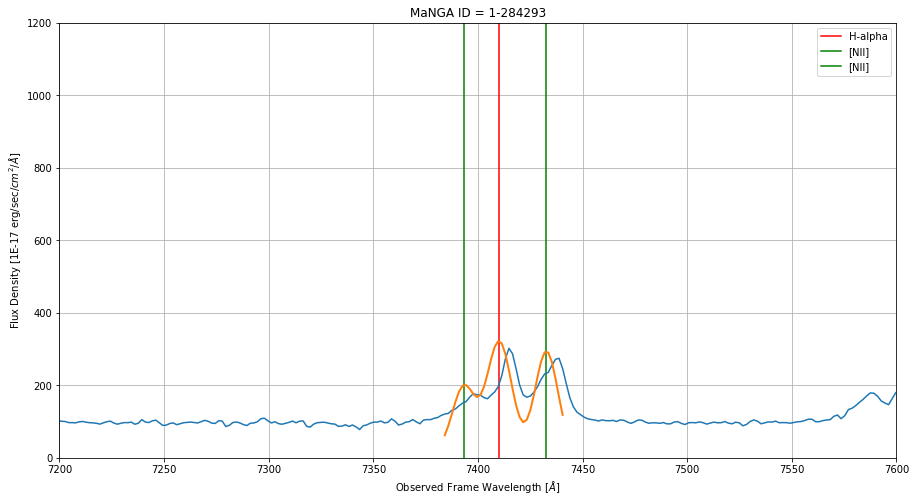

Area 2537.376882209329


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


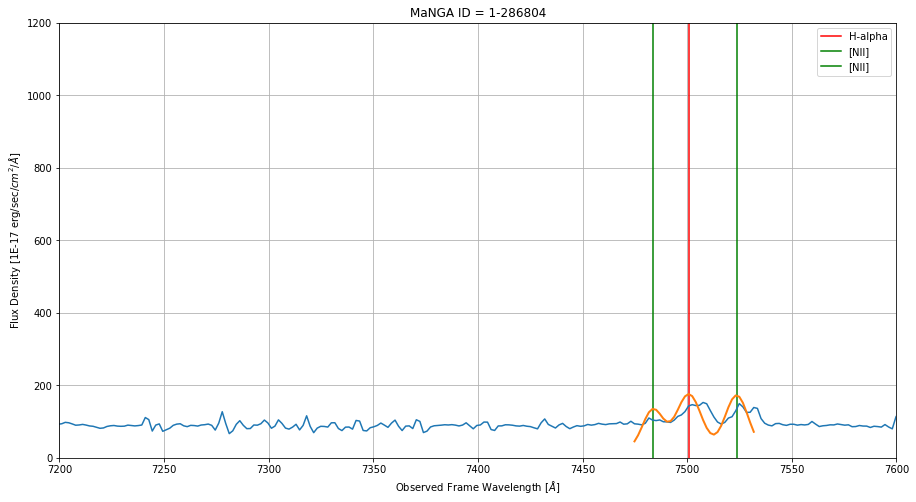

Area 3373.7149784883145


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


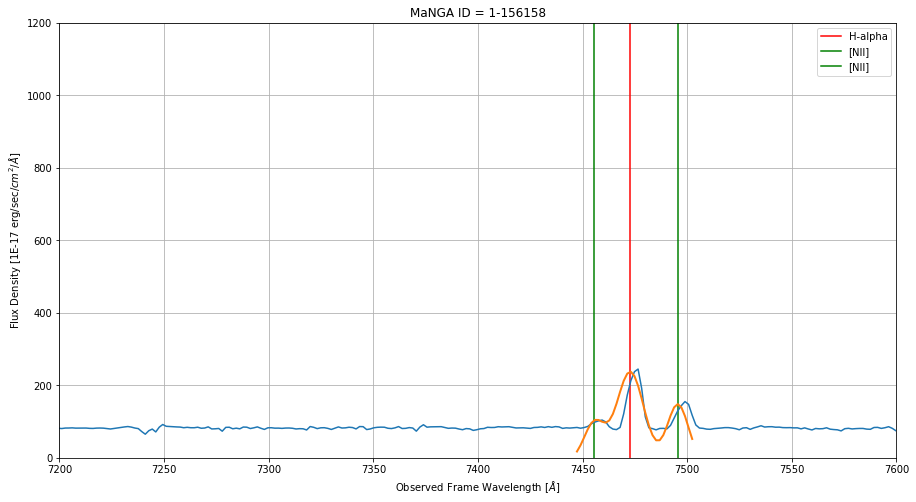

Area 3965.5294896159767


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


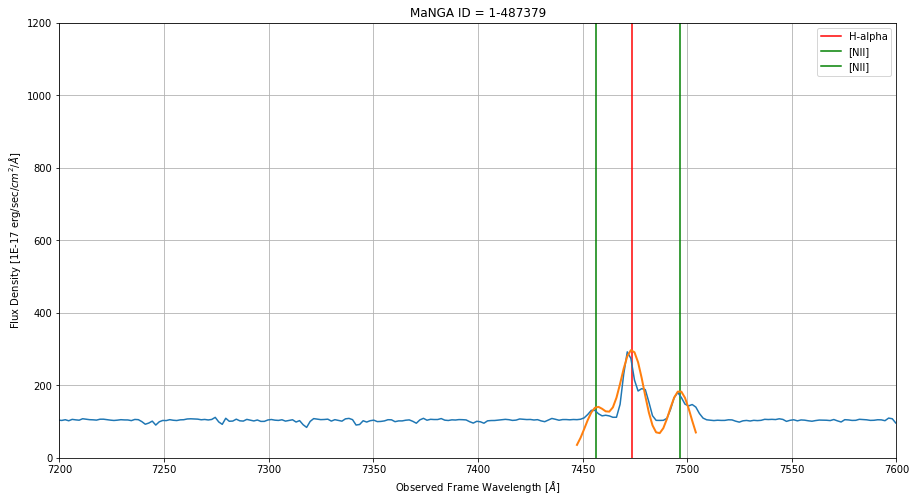

Area 5076.691969900557


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


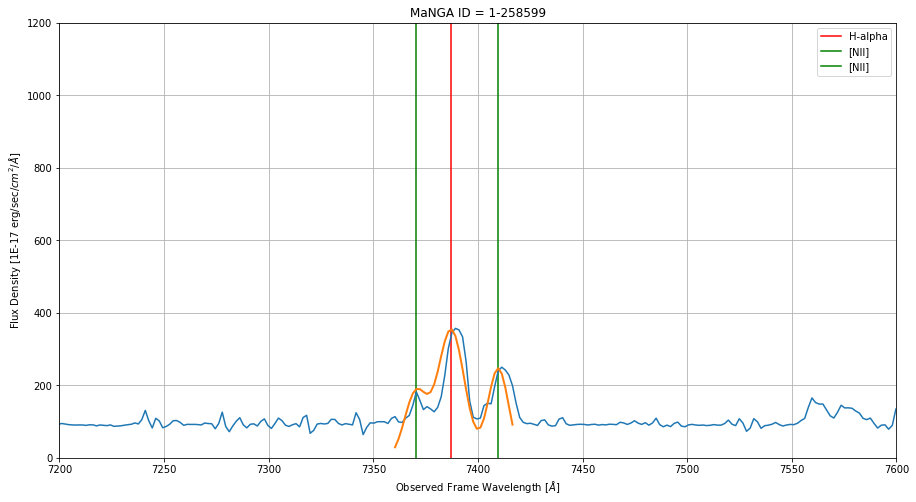

Area 3786.475422304368


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


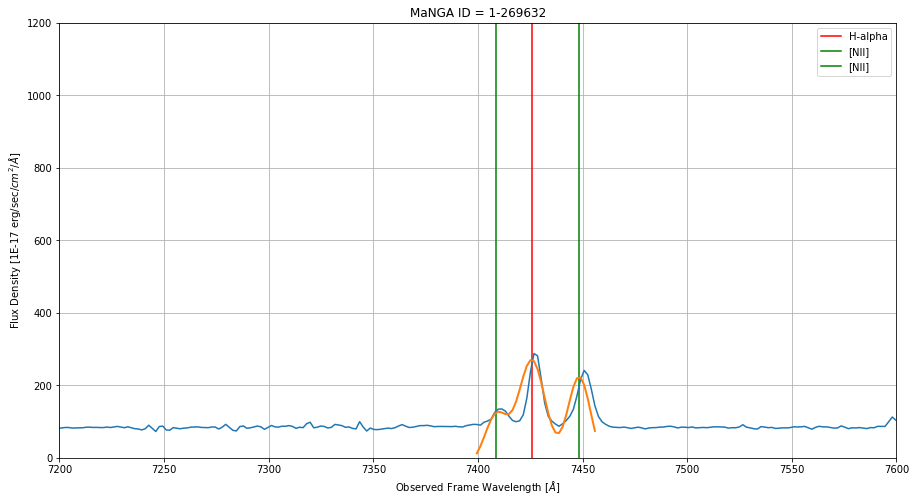

In [12]:
for plateifu in ha_list2:
#     print(plateifu)
    data = fits.open(f'/Volumes/WD_External/MaNGA_Sample_with_[OIII]/manga-{plateifu[0]}-LOGCUBE.fits.gz')
    mangaid = data[0].header['MANGAID']
    
    flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))

    ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

    mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))
    
    do_not_use = (mask & 2**10) != 0 
    
    wave = data['WAVE'].data
    
    sumflux = spectrum_gen(flux, ivar)
    
    peak_ha = 6563*(1+plateifu[1])
    peak_6548 = 6548*(1+plateifu[1])
    peak_6583 = 6583*(1+plateifu[1])
#     print(peak)
    bound_ha = np.where(np.logical_and(wave > peak_ha-10, wave < peak_ha+13))
    bound_6548 = np.where(np.logical_and(wave > peak_6548-10, wave < peak_6548+10))
    bound_6583 = np.where(np.logical_and(wave > peak_6583-10, wave < peak_6583+10))
    
#     print('bound', bound_6548, bound_6583)
    
    lb_ha = bound_ha[0][0]
    ub_ha = bound_ha[0][-1]
    
    lb_6548 = bound_6548[0][0]
    ub_6548 = bound_6548[0][-1] 
    
    lb_6583 = bound_6583[0][0]
    ub_6583 = bound_6583[0][-1] 
    
#     print(lb_6548, ub_6548, lb_ha, ub_ha, lb_6583, ub_6583)
#     print(wave[lb_6548], wave[ub_6548], wave[lb_ha], wave[ub_ha], wave[lb_6583], wave[ub_6583])
    
    sumflux_slice_ha = sumflux[lb_ha : ub_ha]
    sumflux_slice_6548 = sumflux[lb_6548 : ub_6548]
    sumflux_slice_6583 = sumflux[lb_6583 : ub_6583]
    
    sumflux_slice = sumflux[lb_6548 : ub_6583]
    
#     print('sumflux_slice',sumflux_slice)

    wave_slice_ha = wave[lb_ha : ub_ha]
    wave_slice_6548 = wave[lb_6548 : ub_6548]
    wave_slice_6583 = wave[lb_6583 : ub_6583]
    
    wave_slice = wave[lb_6548 : ub_6583]
    
#     print('wave_slice', wave_slice)
    
    amp_ha = max(sumflux_slice_ha)
    mean_ha = peak_ha
    sigma_ha = np.std(wave_slice_ha)
#     base_ha = min(sumflux_slice_ha)
    
    amp_6548 = max(sumflux_slice_6548)
    mean_6548 = peak_6548
    sigma_6548 = np.std(wave_slice_6548)
#     base_6548 = min(sumflux_slice_6548)
    
    amp_6583 = max(sumflux_slice_6583)
    mean_6583 = peak_6583
    sigma_6583 = np.std(wave_slice_6583)
#     base_6583 = min(sumflux_slice_6583)

    base = min(sumflux_slice)
    
    p0_ = [amp_ha, amp_6548, amp_6583,
           mean_ha, mean_6548, mean_6583,
           sigma_ha, sigma_6548, sigma_6583,
           base]
    
    popt, pcov = curve_fit(three_gaussian, wave_slice, sumflux_slice, p0 = p0_)
    
    dx = (wave_slice_ha[-1] - wave_slice_ha[0]) / len(wave_slice_ha)
    left_idx = ub_6548 - lb_6548
    right_idx = left_idx + len(wave_slice_ha)
    
#     print(three_gaussian(wave_slice, *popt))
    area = np.trapz(three_gaussian(wave_slice, *popt)[left_idx : right_idx], wave_slice_ha, dx = dx)
    print('Area', area)
#     print('popt', popt)
#     print('pcov', pcov)
    
# #     print('amp', amp)
# #     print('sigma', sigma)
# #     print('base', base)
    
#     popt, pcov = curve_fit(gaussian, wave_slice, sumflux_slice, p0 = [amp, mean, sigma, base])
# #     print('popt', popt)
# #     print('pcov', pcov)
    
# #     plt.plot(wave_slice, gaussian(wave_slice, *popt))
# #     plt.show()
    
# #     print(sumflux, len(sumflux))
    
    plt.figure(figsize = (15,8))
    plt.grid()
    plt.axvline(6563*(1+plateifu[1]), color = 'red', label = 'H-alpha')
    plt.axvline(6548*(1+plateifu[1]), color = 'green', label = '[NII]')
    plt.axvline(6583*(1+plateifu[1]), color = 'green', label = '[NII]')
    plt.legend()
#     plt.axvline(wave[lb], color = 'deeppink')
#     plt.axvline(wave[ub], color = 'deeppink')
#     plt.xlim(6300,6700)
    plt.xlim(7200, 7600)
#     plt.xlim(wave[lb]-10, wave[ub]+10)
    plt.ylim(0, 1200)
    plt.xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
    plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
    plt.title(f'MaNGA ID = {mangaid}')
    
    plt.plot(wave, sumflux)
    plt.plot(wave_slice, three_gaussian(wave_slice, *popt), linewidth = 2)
    
    plt.show()